# Khám phá dữ liệu qua các câu hỏi và câu trả lời

In [2]:
# import những thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Đọc dữ liệu đã tiền xử lý ở phần trước
df = pd.read_csv('../data/cleaned_dataset.csv')
df.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương thấp nhất,Mức lương cao nhất,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
307,"TP.HCM, Bình Định",2.0,Chuyên viên- nhân viên,Không yêu cầu,12,Toàn thời gian cố định,Trung cấp,Dưới 1 năm,Bán sỉ - Bán lẻ - Quản lý cửa hàng/Bán hàng - ...,150 - 300 người,2,8.0,17.0,12.5,20.0,31.0,25.5
1412,TP.HCM,NaN,Chuyên viên- nhân viên,Nữ,5,Bán thời gian cố định,Không,Chưa có kinh nghiệm,Khách sạn - Nhà hàng - Du lịch/Nghề nghiệp khá...,10 - 150 người,1,20.0,25.0,22.5,NaN,NaN,NaN
1075,Vĩnh Phúc,2.0,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Trung học,Dưới 1 năm,Tài chính - Đầu tư - Chứng Khoán/Ngân hàng/Bán...,Trên 300 người,1,8.0,15.0,11.5,18.0,35.0,26.5
734,TP.HCM,2.0,Chuyên viên- nhân viên,Nam,1,Toàn thời gian cố định,Cao đẳng,1 năm,Thông tin - Truyền thông - Quảng cáo/Truyền hì...,10 - 150 người,1,10.0,18.0,14.0,NaN,NaN,NaN
836,Bình Định,NaN,Chuyên viên- nhân viên,Nam,5,Toàn thời gian cố định,Đại học,Chưa có kinh nghiệm,Nông - Lâm - Ngư nghiệp/Chăn nuôi - Thú y/Khoa...,Trên 300 người,2,9.0,10.0,9.5,NaN,NaN,NaN


In [5]:
carreer = pd.Series(df['Ngành nghề'].str.split('/').explode().str.strip())
num_carreer = carreer.nunique()
print('Số ngành nghề: ', num_carreer)
carreer_value = pd.DataFrame(carreer.value_counts())
carreer_value.reset_index(inplace=True)
carreer_value.columns = ['Ngành nghề', 'Số lượng']
carreer_value

Số ngành nghề:  51


,Ngành nghề,Số lượng
0,Bán hàng - Kinh doanh,715
1,Chăm sóc khách hàng,308
2,Bán sỉ - Bán lẻ - Quản lý cửa hàng,287
3,Tài chính - Đầu tư - Chứng Khoán,230
4,Hành chính - Thư ký,206
5,Kế toán,184
6,Khoa học - Kỹ thuật,157
7,Marketing,154
8,Ngân hàng,140
9,Kiểm toán,124


- Xét 10 ngành nghề có số lượng công việc tuyển cao nhất

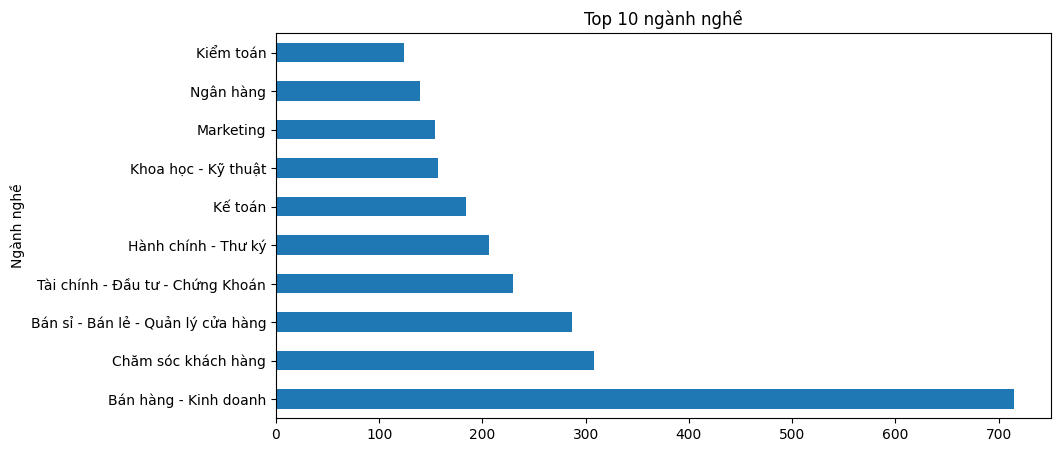

In [6]:
top10_carreer = carreer.value_counts().head(10)
top10_carreer.plot(kind='barh', figsize=(10, 5), title='Top 10 ngành nghề');

- Các công việc này sẽ có yêu cầu bằng cấp như thế nào?

In [7]:
degree_requirements = pd.DataFrame(df['Yêu cầu bằng cấp'].value_counts())
degree_requirements.reset_index(inplace=True)
degree_requirements.columns = ['Yêu cầu bằng cấp', 'Số lượng']
degree_requirements

,Yêu cầu bằng cấp,Số lượng
0,Cao đẳng,527
1,Trung học,317
2,Trung cấp,302
3,Đại học,294
4,Không,220
5,Chứng chỉ,19


- Các công việc này có yêu cầu về kinh nghiệm làm việc không?

In [8]:
exp_requirements = pd.DataFrame(df['Yêu cầu kinh nghiệm'].value_counts())
exp_requirements.reset_index(inplace=True)
exp_requirements.columns = ['Yêu cầu kinh nghiệm', 'Số lượng']
exp_requirements

,Yêu cầu kinh nghiệm,Số lượng
0,Chưa có kinh nghiệm,532
1,1 năm,474
2,Dưới 1 năm,301
3,2 năm,231
4,3 năm,100
5,5 năm,25
6,4 năm,9
7,Hơn 5 năm,7
